<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Iván Paniagua García de León.

**Fecha:** 06 de mayo del 2020.

**Expediente** : 709025.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 10: Clase 22

## Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [3]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')
# aapl

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2020-06-19,75.0,call,AAPL200619C00075000,...,2020-05-06 09:17:56,2020-04-17 19:16:55,"{'contractSymbol': 'AAPL200619C00075000', 'str..."
2020-06-19,75.0,put,AAPL200619P00075000,...,2020-05-06 09:17:56,2020-05-05 17:53:41,"{'contractSymbol': 'AAPL200619P00075000', 'str..."
2021-01-15,75.0,call,AAPL210115C00075000,...,2020-05-06 09:17:56,2020-05-01 16:10:32,"{'contractSymbol': 'AAPL210115C00075000', 'str..."
2021-01-15,75.0,put,AAPL210115P00075000,...,2020-05-06 09:17:56,2020-05-05 18:36:18,"{'contractSymbol': 'AAPL210115P00075000', 'str..."
2021-06-18,75.0,call,AAPL210618C00075000,...,2020-05-06 09:17:56,2020-04-09 14:58:06,"{'contractSymbol': 'AAPL210618C00075000', 'str..."
...,...,...,...,...,...,...,...
2022-01-21,500.0,put,AAPL220121P00500000,...,2020-05-06 09:17:56,2020-05-05 19:50:00,"{'contractSymbol': 'AAPL220121P00500000', 'str..."
2022-01-21,505.0,call,AAPL220121C00505000,...,2020-05-06 09:17:56,2020-05-05 17:38:05,"{'contractSymbol': 'AAPL220121C00505000', 'str..."
2022-01-21,510.0,call,AAPL220121C00510000,...,2020-05-06 09:17:56,2020-05-05 18:56:16,"{'contractSymbol': 'AAPL220121C00510000', 'str..."


In [4]:
aapl_opt.Underlying_Price[0]

299.96

In [8]:
fecha1 = '2020-06-19'
fecha2 = '2021-01-15'
put06_f1 = aapl_opt.loc[(aapl_opt.Expiry== fecha1) & (aapl_opt.Type=='put')]
put06_f2 = aapl_opt.loc[(aapl_opt.Expiry== fecha2) & (aapl_opt.Type=='put')]
put06_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1,75.0,2020-06-19,put,...,2020-05-06 09:17:56,2020-05-05 17:53:41,"{'contractSymbol': 'AAPL200619P00075000', 'str..."
7,80.0,2020-06-19,put,...,2020-05-06 09:17:56,2020-05-04 13:44:14,"{'contractSymbol': 'AAPL200619P00080000', 'str..."
13,85.0,2020-06-19,put,...,2020-05-06 09:17:56,2020-05-05 15:36:29,"{'contractSymbol': 'AAPL200619P00085000', 'str..."
19,90.0,2020-06-19,put,...,2020-05-06 09:17:56,2020-05-05 16:23:26,"{'contractSymbol': 'AAPL200619P00090000', 'str..."
25,95.0,2020-06-19,put,...,2020-05-06 09:17:56,2020-04-30 17:27:27,"{'contractSymbol': 'AAPL200619P00095000', 'str..."
...,...,...,...,...,...,...,...
1746,440.0,2020-06-19,put,...,2020-05-06 09:17:56,2020-04-30 13:47:33,"{'contractSymbol': 'AAPL200619P00440000', 'str..."
1764,450.0,2020-06-19,put,...,2020-05-06 09:17:56,2020-01-31 17:18:29,"{'contractSymbol': 'AAPL200619P00450000', 'str..."
1797,470.0,2020-06-19,put,...,2020-05-06 09:17:56,2020-01-31 17:16:19,"{'contractSymbol': 'AAPL200619P00470000', 'str..."
1831,490.0,2020-06-19,put,...,2020-05-06 09:17:56,2020-02-10 17:09:39,"{'contractSymbol': 'AAPL200619P00490000', 'str..."


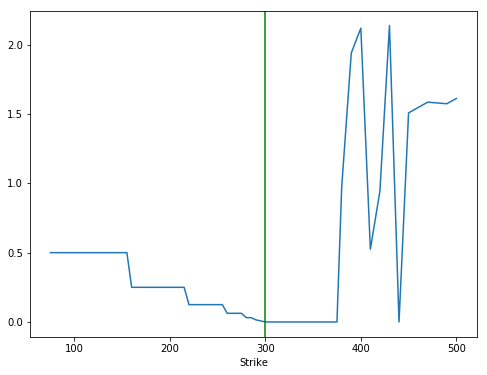

In [9]:
# sonrisa de volatilidad para los put de la fecha 1
ax = put06_f1.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f1.Underlying_Price.iloc[0], color='g');

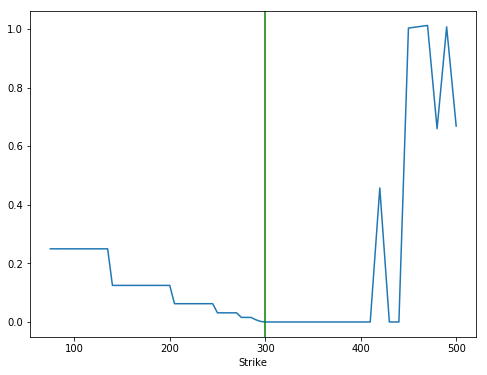

In [10]:
# para los put de la fecha 2
ax = put06_f2.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06_f2.Underlying_Price.iloc[0], color='g');

In [11]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

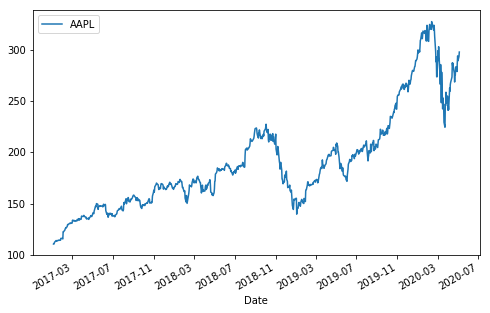

In [12]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [13]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

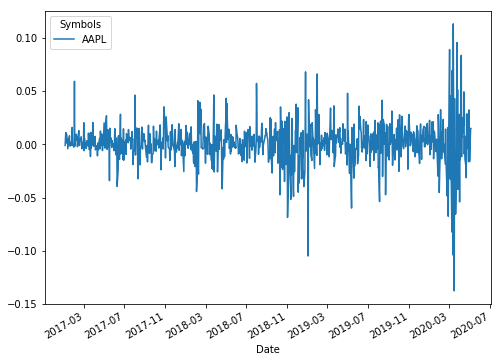

In [14]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [15]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2020-05-08,242.5,call,AAPL200508C00242500,...,2020-05-06 09:35:31,2020-05-04 19:59:25,"{'contractSymbol': 'AAPL200508C00242500', 'str..."
2020-05-08,285.0,put,AAPL200508P00285000,...,2020-05-06 09:35:31,2020-05-05 19:59:58,"{'contractSymbol': 'AAPL200508P00285000', 'str..."
2020-05-08,345.0,put,AAPL200508P00345000,...,2020-05-06 09:35:31,2020-05-05 19:18:34,"{'contractSymbol': 'AAPL200508P00345000', 'str..."
2020-05-08,345.0,call,AAPL200508C00345000,...,2020-05-06 09:35:31,2020-05-05 19:53:58,"{'contractSymbol': 'AAPL200508C00345000', 'str..."
2020-05-08,190.0,put,AAPL200508P00190000,...,2020-05-06 09:35:31,2020-05-01 14:56:10,"{'contractSymbol': 'AAPL200508P00190000', 'str..."
...,...,...,...,...,...,...,...
2022-06-17,160.0,call,AAPL220617C00160000,...,2020-05-06 09:35:31,2020-04-30 19:27:17,"{'contractSymbol': 'AAPL220617C00160000', 'str..."
2022-06-17,160.0,put,AAPL220617P00160000,...,2020-05-06 09:35:31,2020-04-30 13:43:43,"{'contractSymbol': 'AAPL220617P00160000', 'str..."
2022-06-17,300.0,put,AAPL220617P00300000,...,2020-05-06 09:35:31,2020-05-05 19:02:12,"{'contractSymbol': 'AAPL220617P00300000', 'str..."


In [16]:
K = 290 # strike price
indice_opt = aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==K) & (aapl_opt.Expiry=='2021-01-15')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1114,290.0,2021-01-15,put,...,2020-05-06 09:35:31,2020-05-05 19:34:16,"{'contractSymbol': 'AAPL210115P00290000', 'str..."


In [17]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 30.0,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 187,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1588707256,
 'impliedVolatility': 0.007822421875,
 'inTheMoney': False}

### Rendimiento Simple

In [18]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2020-04-29,0.033
2020-04-30,0.021
2020-05-01,-0.016


In [19]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

nscen = 10
dates = pd.date_range(start = today, end = expiry, freq='b')
ndays = len(dates)
dates

DatetimeIndex(['2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11',
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
               '2020-05-18', '2020-05-19',
               ...
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15'],
              dtype='datetime64[ns]', length=183, freq='B')

In [20]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,7,8,9
2020-05-06,-6.665e-03,-1.062e-02,-4.779e-02,...,-1.954e-02,1.680e-05,-2.598e-02
2020-05-07,2.396e-06,3.575e-04,-2.922e-04,...,-2.345e-04,2.059e-07,-7.211e-04
2020-05-08,-6.309e-08,3.461e-06,-1.205e-05,...,-1.136e-06,3.400e-09,-3.557e-06
2020-05-11,-5.444e-10,-6.919e-08,-2.069e-08,...,3.428e-08,-5.928e-11,6.273e-08
2020-05-12,-2.826e-12,-4.222e-10,3.763e-10,...,1.236e-10,5.644e-13,2.651e-10
...,...,...,...,...,...,...,...
2021-01-11,0.000e+00,-0.000e+00,0.000e+00,...,0.000e+00,0.000e+00,0.000e+00
2021-01-12,0.000e+00,-0.000e+00,-0.000e+00,...,-0.000e+00,0.000e+00,-0.000e+00
2021-01-13,0.000e+00,0.000e+00,-0.000e+00,...,-0.000e+00,-0.000e+00,0.000e+00
2021-01-14,0.000e+00,0.000e+00,-0.000e+00,...,-0.000e+00,-0.000e+00,0.000e+00


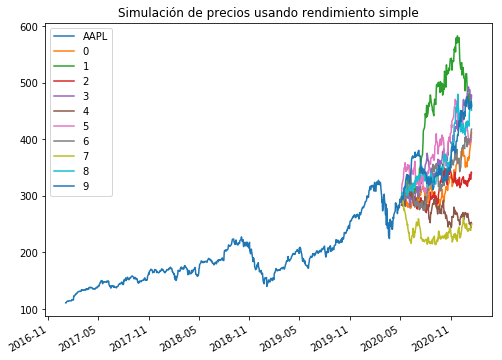

In [21]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

### Rendimiento logarítmico

In [22]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

0.6953179825303627

In [23]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.019194817155124378, 0.019235552000953192)

In [24]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 30.0,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 187,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1588707256,
 'impliedVolatility': 0.007822421875,
 'inTheMoney': False}

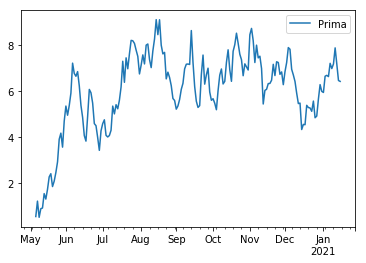

In [25]:
strike = pd.DataFrame(opcion_valuar['JSON']['strike']*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(strike-S_T2,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [26]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.001178631639959826, 0.019235552000953192)

In [27]:
# Tasa de bonos de 1 yr de fecha 30/04/20 -> 0.16%
r = 0.0016/360 # Tasa diaria

In [28]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

ndays = (expiry - today).days
nscen = 10
dates = pd.date_range(start='2019-11-14', periods = ndays)
dates

DatetimeIndex(['2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-23',
               ...
               '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18',
               '2020-07-19', '2020-07-20', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-24'],
              dtype='datetime64[ns]', length=254, freq='D')

In [29]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2019-11-14,-0.007,0.014,-0.022,...,-0.018,0.009,-0.011
2019-11-15,-0.033,0.011,-0.025,...,-0.027,0.025,0.002
2019-11-16,-0.017,0.040,-0.023,...,-0.022,0.033,-0.010
2019-11-17,0.024,0.040,-0.048,...,-0.031,0.035,-0.034
2019-11-18,0.066,0.051,-0.045,...,-0.068,0.047,-0.056
...,...,...,...,...,...,...,...
2020-07-20,0.405,0.379,0.203,...,-0.313,0.119,-0.122
2020-07-21,0.443,0.400,0.181,...,-0.306,0.092,-0.130
2020-07-22,0.471,0.364,0.183,...,-0.301,0.102,-0.132
2020-07-23,0.444,0.377,0.219,...,-0.280,0.085,-0.140


In [30]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2019-11-14,295.590,301.660,291.074,...,292.156,300.168,294.384
2019-11-15,287.874,300.893,290.190,...,289.572,305.116,298.028
2019-11-16,292.439,309.729,290.651,...,291.098,307.614,294.549
2019-11-17,304.863,309.730,283.635,...,288.402,308.114,287.728
2019-11-18,318.019,312.989,284.533,...,278.028,311.813,281.476
...,...,...,...,...,...,...,...
2020-07-20,446.124,434.882,364.610,...,217.646,335.188,263.343
2020-07-21,463.218,443.930,356.498,...,219.085,326.376,261.341
2020-07-22,476.678,428.206,357.189,...,220.210,329.675,260.634
2020-07-23,464.024,434.028,370.252,...,224.983,324.069,258.572


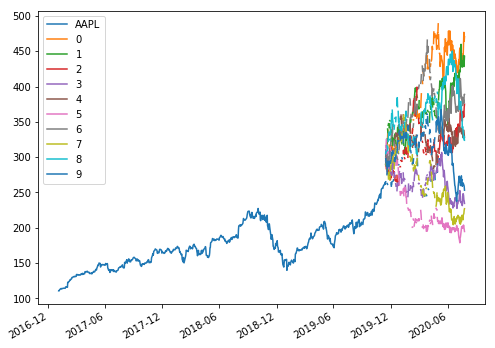

In [31]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [32]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 30.0,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 187,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1588707256,
 'impliedVolatility': 0.007822421875,
 'inTheMoney': False}

In [47]:
impliedv=opcion_valuar['JSON'].get("impliedVolatility")
impliedv

0.007822421875

In [48]:
sigma = impliedv/np.sqrt(252)
sigma

0.0004927662602733711

In [49]:
from datetime import date
Hoy = date.today()
K = opcion_valuar['JSON']['strike']  # strike price
ndays = (opcion_valuar.Expiry - today).days
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

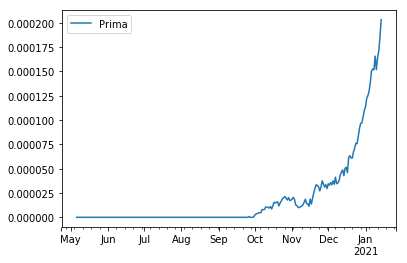

In [50]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [51]:
# Con un intervarlo de confianza del 99%
put.iloc[-1]

Prima    2.030e-04
Name: 2021-01-14 00:00:00, dtype: float64

In [52]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(-0.018861878996835352, 0.01926794831122802)
(-0.01886151509699201, 0.019267584411384677)


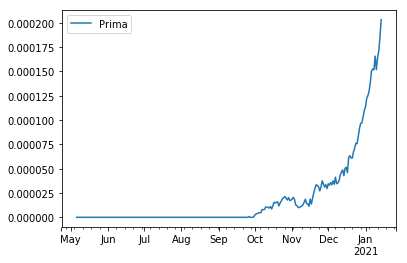

In [53]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [54]:
put.iloc[-1]

Prima    2.030e-04
Name: 2021-01-14 00:00:00, dtype: float64

In [55]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(-0.018861878996835352, 0.01926794831122802)
(-0.01886151509699201, 0.019267584411384677)


### Análisis de la distribución de los rendimientos

### Ajustando normal

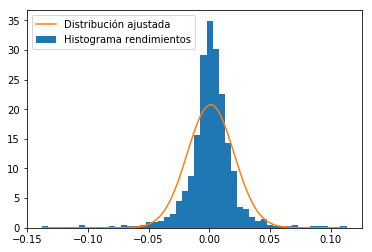

In [56]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

### Ajustando t

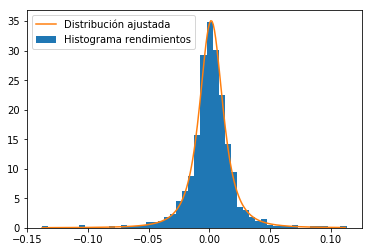

In [57]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen,df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

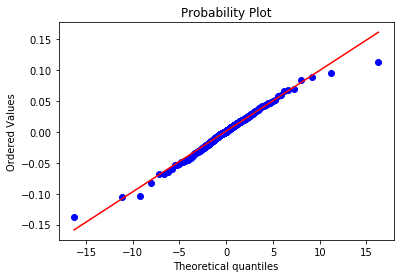

In [58]:
st.probplot(ren['AAPL'],sparams= dof, dist='t', plot=plt);

## 3. Valuación usando simulación: uso del histograma de rendimientos

Todo el análisis anterior se mantiene. Solo cambia la forma de generar los números aleatorios para la simulación montecarlo.

Ahora, generemos un histograma de los rendimientos diarios para generar valores aleatorios de los rendimientos simulados.

In [59]:
ndays = 109 
nscen = 10

In [60]:
prob = y/np.sum(y)
values = x[1:]

In [61]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2020-05-06,-0.002,-0.012,0.023,...,-0.002,0.003,-0.017
2020-05-07,0.038,0.018,-0.007,...,0.033,0.013,0.018
2020-05-08,-0.002,0.013,-0.002,...,0.018,-0.017,-0.022
2020-05-09,-0.017,-0.017,0.008,...,0.003,-0.002,0.013
2020-05-10,-0.002,0.038,-0.012,...,0.003,0.013,0.013
...,...,...,...,...,...,...,...
2020-08-18,-0.027,0.098,-0.047,...,-0.017,0.003,-0.007
2020-08-19,-0.017,0.003,0.018,...,-0.002,0.018,0.013
2020-08-20,0.003,0.113,-0.002,...,0.033,-0.017,-0.022
2020-08-21,-0.002,0.003,0.003,...,-0.002,-0.007,0.023


In [62]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2020-05-06,296.894,293.930,304.436,...,296.894,298.387,292.459
2020-05-07,308.362,299.217,302.235,...,306.818,302.235,297.720
2020-05-08,307.671,303.075,301.558,...,312.337,297.053,291.151
2020-05-09,302.397,297.879,303.918,...,313.206,296.388,294.905
2020-05-10,301.720,309.385,300.210,...,314.077,300.210,298.707
...,...,...,...,...,...,...,...
2020-08-18,462.980,496.670,456.063,...,392.333,684.736,511.849
2020-08-19,455.042,498.051,464.267,...,391.455,697.053,518.448
2020-08-20,456.308,557.721,463.228,...,404.540,685.103,507.010
2020-08-21,455.286,559.272,464.516,...,403.635,680.149,518.726


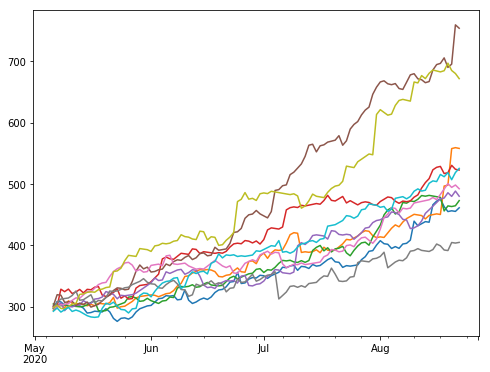

In [63]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5,1,'Simulación usando el histograma de los rendimientos')

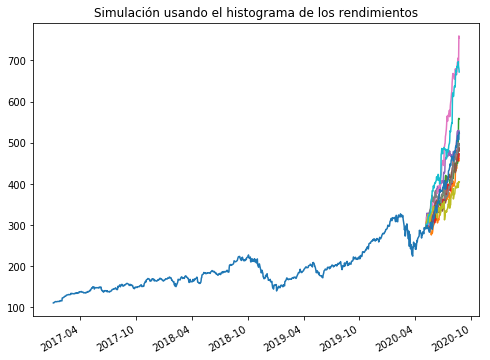

In [64]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [65]:
K=240
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

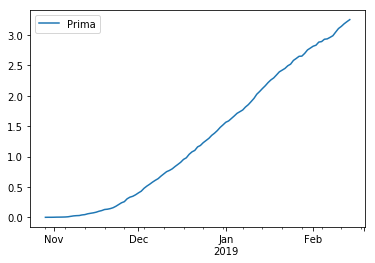

In [66]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [67]:
put_hist.iloc[-1]

Prima    3.253
Name: 2019-02-14 00:00:00, dtype: float64

In [68]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 30.0,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 187,
 'openInterest': 0,
 'bid': 0.0,
 'ask': 0.0,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1588707256,
 'impliedVolatility': 0.007822421875,
 'inTheMoney': False}

In [69]:
# Intervalo de confianza del 95%
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(2.047452595397193, 4.458118436769645)
(2.047598498929342, 4.457972533237497)


Como podemos observar, partiendo del mismo precio de ejercicio, el cual fue de 290, las primas en el caso put, fueron mucho más bajas en precio en comparación con lo que obtuvimos al hacer el ejercicio con las call. Esto se puede deber a que el precio de ejercicio es bajo, incluso más bajo que el precio actual de la acción, por lo que si quieres tener el derecho a comprar una acción a ese strike price, tendrías que pagar mucho más, en cambio si quisieras vender a ese precio mas bajo, sería por ende, más baja la prima.